# University Admission Prediction with Logistics Regression

In this project, we will build a binary classification model using Logistics Regression to predict whether a student will be admitted to a university based on their academic profile.

Also, we will be covering 2 different methods to compare the log_loss and accuracy values: SVM and Random Forest Classifier.

### The Columns
1. **GRE Score**: Standardized test score for graduate school admission, assessing verbal, quantitative, and analytical skills.

2. **TOEFL Score**: Test of English proficiency for non-native speakers.

3. **University Rating**: A numerical rating of the university's reputation.

4. **SOP (Statement of Purpose)**: Personal essay explaining why the applicant wants to study at the university.

5. **LOR (Letter of Recommendation)**: A letter from a recommender supporting the applicant's qualifications.

6. **CGPA (Cumulative Grade Point Average)**: The applicant's overall academic performance during undergraduate studies.

7. **Research**: Whether the applicant has previous research experience (1 for yes, 0 for no).
8. **Chance of Admit**: Possibility of getting admitted.

### Main Deliverables

- Cleaned dataset and preprocessing steps  
- Trained logistic regression model  
- Evaluation metrics (accuracy, precision, recall, F1-score)  
- Learning process summary (weights, bias, stopping)  
- Interpretation and improvement ideas




## Understanding the Dataset
Starting with connecting to Google Drive and importing the dataset as a pandas DataFrame.

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

In [145]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Visualization

### Chance of Admit Distribution

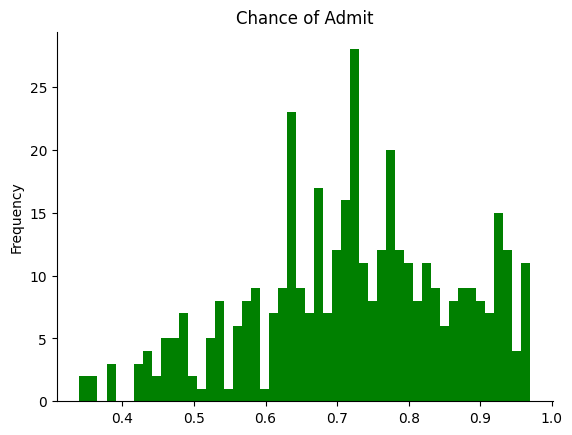

In [146]:
import matplotlib.pyplot as plt
df['Chance of Admit '].plot(kind='hist', bins=50, title='Chance of Admit', color="green")
plt.gca().spines[['top', 'right',]].set_visible(False)

See the distribution of TOEFL grades here. It's mostly aggregated around 105-110, which means these students generally tend to have a good level of english level and an academic profile.

### GRE Score vs TOEFL Score

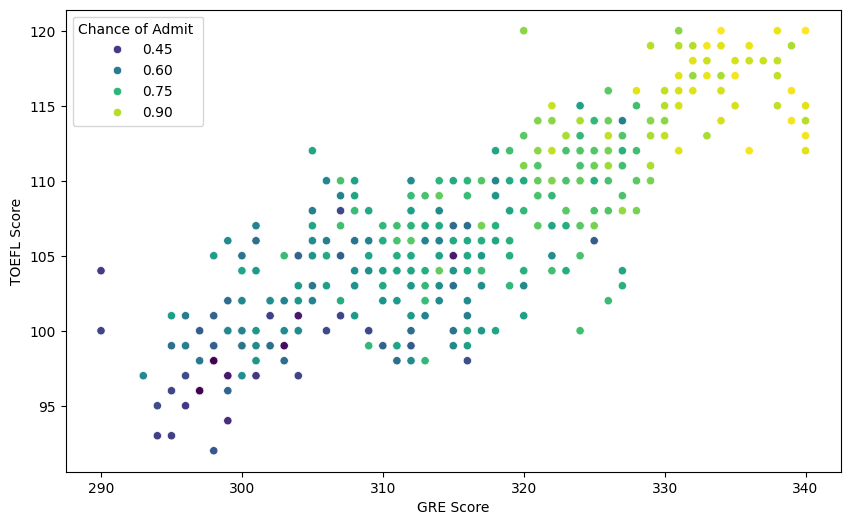

In [147]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score', hue='Chance of Admit ', palette='viridis')
plt.show()

See here as the GRE (Graduate Record Examinations) score increases, TOEFL score and Chance of Admit also increases which means there is a positive correlation between these three variables, expectedly.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


As we can clearly see from here, we don't have to operate a missing value analysis, since there aren't any missing values. Also, the variables are in their correct form of data types.

In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


Since we don't have a very big and complex dataset, the numerical values also represent

## Preprocessing the Dataset

### Steps:
1. Missing value analysis
2. Feature Engineering

In [150]:
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.75).astype(int)

In the cell above, we set Chance of Admit column values
* 1: if the possibility is greater or equal than 0.75
* 0: if the possibility is less than 0.75
which will return boolean values. Then, by .astype(int), we convert the column from boolean into integer value. This will ease the classification process.

In [151]:
df = df.drop(columns=["Serial No.", "Chance of Admit "], axis=1)

We dropped these columns because:
* We didn't need Serial No. (it was unnecessary)
* We already converted Chance of Admit into another column and didn't want to confuse the model with irrelevant data.

In [152]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit Binary
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0
399,333,117,4,5.0,4.0,9.66,1,1


This is a table of success.

In [153]:
df["Chance of Admit Binary"].groupby(df["Chance of Admit Binary"]).count()

,Chance of Admit Binary
Chance of Admit Binary,
0,220
1,180


This is not a big problem but we can apply SMOTE to adjust the distribution. But applying SMOTE to the entire dataset will cause data leakage, which we are not content with. So, we will apply this step **AFTER** train and test split stage.

## Splitting the Data
In this section, we will split the data into %80 train and %20 test sets.
### Steps:
1. Train Test Split (80-20)
2. SMOTE
3. Feature Scaling

In [154]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Chance of Admit Binary")
y = df["Chance of Admit Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [155]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

from collections import Counter

print("New class distribution:", Counter(y_train_smote))

New class distribution: Counter({1: 173, 0: 173})


We splitted our dataset into %80 train and %20 test sets. Also we applied SMOTE to our train set, now our sets are even (has the equal amount of size). Now, we will scale these datasets. Doing the scaling process **after** the train test split is important.

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here we scale our splitted datasets to set the mean of the features to 0. Also, we scale our datasets after splitting into train and test sets because we want to **prevent data leakage**:
If we scale before splitting, the scaler uses information from the entire dataset (including test data) to compute statistics like mean and standard deviation. This would leak information from the test set into the training process — which leads to overly optimistic performance results and a less realistic model.

So, we split the data first, and then fit the scaler only on the training set.
After that, we transform both the training and test sets using that same scaler.

## Hyperparameter Tuning

We do this step to be able to automatically try different parameters which are decided manually by us.

### For Grid Search Cross Validation

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']
}

### For Randomized Search Cross Validation

In [158]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.001, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

Here the uniform keyword is to not manually indicate each point between 0.001 and 10, scipy.stats.uniform() does it automatically.

## Training the Logistic Regression Model
In this section, we will create our logistic regression model and fit it into our dataset. We will use GridSearchCV and RandomizedSearchCV to find the best estimators and parameters, so, to automatically tune our model.

### Steps:
1. Initialize the Logistic Regression Model
2. Fit the model
3. Make Predictions
4. Model Evaluation and Comparison


### Using Grid Search CV
This will be our base model. We will also apply Randomized Search CV, but to just see how fast it is.

In [159]:
from sklearn.linear_model import LogisticRegression

# Here we start our first logreg model and apply grid search using 5 folds
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [160]:
print("Best score: ", grid_search.best_score_)
print("\nBest model: ", grid_search.best_estimator_)
print("\nBest parameters: ", grid_search.best_params_)

Best score:  0.86875

Best model:  LogisticRegression(C=0.01, solver='liblinear')

Best parameters:  {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


According to grid search algorithm's comprehensive research and trials, these are the best values for our parameters we manually indicated above.

### Using Randomized Search CV

In [161]:
log_reg_2 = LogisticRegression()
random_search = RandomizedSearchCV(log_reg_2, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best score: ", random_search.best_score_)
print("\nBest model: ", random_search.best_estimator_)
print("\nBest parameters: ", random_search.best_params_)

Best score:  0.871875

Best model:  LogisticRegression(C=np.float64(0.5818361216819946), solver='liblinear')

Best parameters:  {'C': np.float64(0.5818361216819946), 'penalty': 'l2', 'solver': 'liblinear'}


According to randomized search, these are the values for algorithm's 42nd random_state.

We created our logistic regression model to train with our scaled data and added **Hyperparameter Tuning** step. Now, let's evaluate the models.

## Model Evaluation
### For Grid Search CV

In [162]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125

Confusion Matrix:
 [[41  6]
 [ 1 32]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        47
           1       0.84      0.97      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



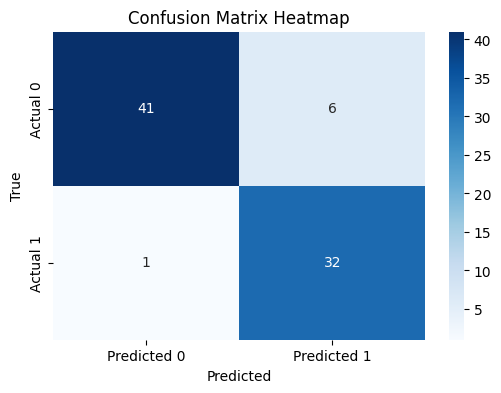

In [163]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

The logistic regression model performs well overall, with 91.25% accuracy. It identifies high admission chances (class 1) very effectively, shown by a recall of 0.97—meaning it rarely misses truly strong applicants. However, the precision for class 1 is 0.84, so a few lower-chance applicants are misclassified as high. In contrast, predictions for low admission chances (class 0) are more precise but slightly less sensitive. Overall, the model is reliable, especially if the goal is to avoid overlooking strong candidates.

In [164]:
from sklearn.metrics import roc_auc_score
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9877498388136686


The logistic regression model shows strong performance, with 91.25% accuracy and an outstanding ROC-AUC of 0.99, indicating excellent ability to distinguish between applicants with high and low chances of admission. It achieves a recall of 0.97 for high-chance candidates (class 1), meaning it very rarely misses them. Precision is slightly lower at 0.84, suggesting a few overestimations. Overall, it's a highly reliable model, especially when the priority is to identify top applicants without missing any.

### For Randomized Search CV

In [165]:
y_pred_2 = grid_search.best_estimator_.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred_2))

Accuracy: 0.9125

Confusion Matrix:
 [[41  6]
 [ 1 32]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        47
           1       0.84      0.97      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



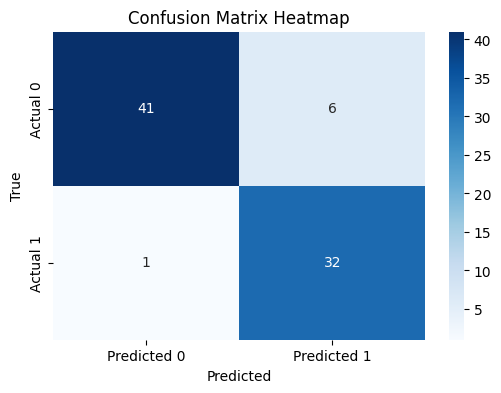

In [166]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [167]:
y_prob = random_search.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9845261121856868


The logistic regression model tuned via Randomized Search performs just as well as the Grid Search version, with 91.25% accuracy and a ROC-AUC of 0.98, reflecting excellent discrimination between classes. It captures almost all high-admission candidates (recall: 0.97), with slightly lower precision (0.84) indicating a few misclassified low-chance applicants. Predictions for low-chance candidates remain precise (0.98 precision). Overall, it's a robust model—well-suited when the goal is not to miss strong applicants.

### Comparison

Both models perform almost identically, with Grid Search having a very slight edge in ROC-AUC. In practice, either would be a solid choice, though Randomized Search is typically faster, especially with large hyperparameter spaces. However, since our dataset is not a very big and complex one, we will be (as mentioned before) going on with grid search cross validation.

## Analyzing the Learning Process

### Steps:
1. Track Weights (W) and Bias (b)
2. Early Stopping

In [168]:
from sklearn.linear_model import SGDClassifier
import numpy as np

# Stochastic Gradient Descent with SGDClassifier
sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-4, random_state=42, verbose=1)

sgd_model.fit(X_train, y_train.values.ravel())

print(f"\nLast Bias (b): {sgd_model.intercept_}")
print(f"Last Weights (W): {sgd_model.coef_[:3]}")  # First 3 weights

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

In the code above, the tol (tolerance) parameter enables early stopping. If the improvement in loss becomes smaller than 1e-4 (0.0001), the training stops early, avoiding unnecessary iterations.
Setting tol=None disables early stopping and forces the model to train for all max_iter iterations.
We can also set verbose=1 to see at which iteration the training stops.

Let's try with a smaller tolerance level:

Although we tried different tol values like 1e-4, 1e-5, and 1e-6, the results remained the same because the model consistently stopped training at the 54th epoch. This indicates that the improvement in loss between epochs becomes smaller than the specified tolerance early on. So, regardless of how strict the tolerance is, the model sees no significant gain and stops. It shows that the model **converges** quickly and stably.

Now, let's try with the tolerance parameter **off**!

In [169]:
sgd_model_no_tol = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42, verbose=1)

sgd_model_no_tol.fit(X_train, y_train.values.ravel())

print(f"\nLast Bias (b): {sgd_model_no_tol.intercept_}")
print(f"Last Weights (W): {sgd_model_no_tol.coef_[:3]}")

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

## Interpretation and Model Improvement

### Steps:
1. Most Influential Features
  - Analyze feature coefficients to identify which features most influence the prediction.
2. Try Alternative Thresholds
  - Test different classification thresholds (e.g., 0.7, 0.8) and evaluate impact.
3. Suggestions for Model Improvement
  - Ideas for improving performance:
    - Add more features  
    - Try other models (e.g., Random Forest, SVM)  
    - Perform cross-validation  
    - Tune hyperparameters  

In [170]:
y_pred_proba = random_search.best_estimator_.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    "Real Value (Y)": y_test.values.flatten(),
    "Predicted Value": y_pred_proba.round(4),
    "Prediction (0 = Not Admitted, 1 = Admitted)": y_pred
})

display(results_df.head(10))

,Real Value (Y),Predicted Value,"Prediction (0 = Not Admitted, 1 = Admitted)"
0,0,0.0943,0
1,0,0.5156,1
2,1,0.9964,1
3,1,0.9396,1
4,0,0.0157,0
5,1,0.9964,1
6,0,0.0028,0
7,0,0.0038,0
8,0,0.0602,0
9,1,0.9460,1


Our model seems to work well from this table, it got its predictions well.

In [171]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import log_loss

cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

y_pred_cv = cross_val_predict(random_search.best_estimator_, X_train, y_train, cv=5)
print("Classification Report:\n", classification_report(y_train, y_pred_cv))

y_proba_cv = cross_val_predict(random_search.best_estimator_, X_train, y_train, cv=5, method='predict_proba')
log_loss_cv = log_loss(y_train, y_proba_cv)
print("Cross-validated Log Loss:", log_loss_cv)
print("Bias: ", random_search.best_estimator_.intercept_)

Cross-validated Accuracy Scores: [0.796875 0.875    0.84375  0.96875  0.875   ]
Mean Accuracy: 0.871875
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       173
           1       0.86      0.86      0.86       147

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320

Cross-validated Log Loss: 0.30106032128685134
Bias:  [-0.34806728]


The logistic regression model achieved a mean cross-validated accuracy of 86.6%, indicating good overall performance. The classification report shows balanced precision and recall for both classes, with a slightly better performance on class 0. The cross-validated log loss is low at 0.30, suggesting that the model's predicted probabilities are well-calibrated. The learned bias term is -0.38, reflecting the model’s decision boundary offset. Cross validation provides a better loss than without using it.